<a href="https://colab.research.google.com/github/mike-scally/ET5003/blob/main/ET5003_Etivity2_MikeScally_9312951.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_Etivity-2

In [140]:
#@title Current Date
Today = '2021-10-02' #@param {type:"date"}


In [141]:
#@markdown ---
#@markdown ### Enter your details here:
Student_ID = "9312951" #@param {type:"string"}
Student_full_name = "Mike Scally" #@param {type:"string"}
#@markdown ---

In [205]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = "Final" #@param ["Draft", "Final"] {type:"raw"}
Submission = True #@param {type:"boolean"}

## INTRODUCTION

###Problem Description

In this Etivity, we will build a supervised machine learning model to predict house prices. We will use data from the house prices dataset to train our model. We will use a linear regression approach in order to predict the relationship between our input variables for house properties, and our target variable the predicted hourse price. We will compare the predicted house prices from our model against the true values from the data, to evaluate the results. These differences between observed and true values are known as residuals (Bock, 2021).

We initially load the data and perform some EDA to understand the composition of the data, the makeup of the different house properties, look for missing data etc. Once we have cleaned up the data, we build a baseline Bayesian multinomial regression model that treats all the data as one and builds a model to predict house prices based on this one model.

We then take a Piecewise regression approach to solving the same problem. Piecewise regression, also known as Segmented Regression is an approach where we break the data into multiple segments, and then apply linear regression seperately on each of the segments. Piecewise regression is useful when data once clustered into individual groups, the independent variables in each of the groups exhibits different relationships between each other. The boundaries between different segments in piecewise regression are called breakpoints (Segmented regression - Wikipedia, 2021)

Piecewise regression is a variation of linear regression and can be used when a single line is not sufficient to model the entire dataset. In such cases, the data is split itto multiple different clusters, and an individual line/model can be fit to each cluster to better represent the data (Kappel, 2017).

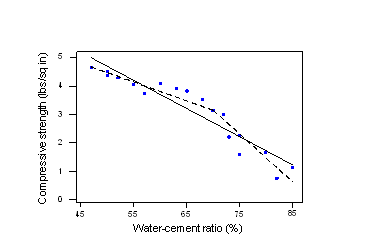

The above diagram shows an example of where piecewise regression can imporve on the prediction of the model. The solid line represents an estimate of the regression line when all the data is treated as one. However, if we break the data into multiple segments, and use piecewise regression to train the model on each segment seperately, we end up with the 2 dotted lines, which shows a better fit for the data (Penn State, 2021).

In piecewise linear regression, if we have one input variable and split our data into two clusters, the  predicted value will be as follows, taking into account the individual clusters, and the breakpoint between clusters:

$$
y(x) = \alpha_1+\beta_1^T x
$$  for x < BP (breakpoint)

$$
y(x) = \alpha_2+\beta_2^T x 
$$  for x > BP (breakpoint)

α1, β1 are the alpha and beta values from the model of the first cluster. Similarly, α2 and β2 are the values from the model for the second cluster

###Dataset

We are using the House Price Dataset for this Etivity. The dataset can be downloaded from [here](https://github.com/UL-ET5003/ET5003_SEM1_2021-2/tree/main/Week-3)

House prices vary greatly from year to year, and also from location to location, and therefore it would be beneficial to have a model that can predict house prices given certain factors.

The dataset contains a list of houses and a list of attributes for each of the houses. The Training data also has the true price value for the listed properties. We will use this trianing data to train our model, and then we will test our model on the test data. The test data also comes with the true price of the house, and we can compare this to the output of our model to check the residuals. 

Here is a sample of the training dataset:
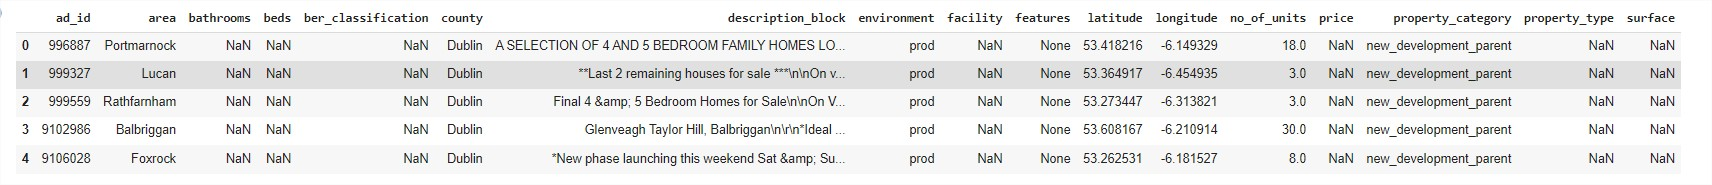

Following is a list of features of the dataset:

*   ad_id - A unique identifier for each property, ignore for the purposes of training the model
*   area - The area the property is located in
*   bathrooms - Number of bathrooms of the property
*   beds - Number of bedrooms in the property
*   ber_classification - The BER rating of the property. As there were a number of missing values in this feature, it was excluded from the training
*   county - The county where the propertyis located.This property was ignored as all records had the same value
*   description_block - A description of the property, as it is a text field it was ignored for training
*   environment - This field was ignored as all records contained the same value
*   facility - Contains a description of the facilities of the property and was ignored as it is a text field
*   features - This contains a text description and was ignored for training
*   latitude - Contains the latitude of the property.
*   longitude - Contains the longitude of the property location
*   no_of_units - Contains the number of units of the property and is ignored in the training as most of the data is blank
*   property_category - Category of the property
*   property_type - COntains the type of property - apartment, detached house etc
*   surface - Contains the surface area of the property. There was a lot of missing values, but there were imputed from existing data
*   price - The target variable for the model, and for the training data is used to train the model

Following the loading of the data, and the exclusion of the fields described above, the following preprocessing was completed on the data:


*   Remove properties from the dataset with a blank or zero value for bedrooms & bathrooms
*   Encode the categorical variables property_type, property_category and area
*   Remove outliers from latitude and longitude variables

###Method
The objective of this Etivity is to use a Supervised Learning approach using Regression to predict house prices given a set of input variables for a property. We train two different models on the data. Initially, we build a single model on the full training dataset using linear regression, and determine the Mean Absolute Error (MAE) and the Mean Absolute Percentage Error (MAPE) of the model. We then split the dataset up into multiple clusters, and use piecewise linear regression on each of the clusters individually. Again, we calculate the MAE and MAPE of each of the clusters individually, and we should expect our new cluster models to have a lower error rate than the overall model. The reason for this is each of the clusters is treated individually, and we can fit a better model when each cluster is treated seperately.

In a study (Ryan and Porth, 2007) the authors discuss the application of Piecewise Regression to Bedload Transport Data. The authors discuss that when modelling a relationship between an input variable x and a target variable y, different linear relationships may occur between the two variables for different ranges of x. IN this case, it may not be appropriate to use a single linear regression model, but piecewise linear regression allows for multiple linear models to suit the different ranges of x. In our case, we have choosen latitude and longitude as our input variables, and we are looking to split the data into clusters based on these variables.

After completing the EDA, I created a heatmap of all the variables to determine the correlation between each one and the price target variable. From the heatmap we can see that bedrooms, bathrooms and longitude have the nighest correlation with price. To validate these findings, I have trained a Random Forest Regressor model to determine the most important features. Below is a histogram showing the relevant important of the top 10 features:

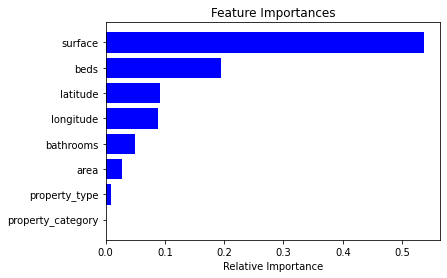

Again, we can see surface, beds, latitude, longitude and bathrooms are the most important features. Using these features, we use a standard scaler on all our input variables so that each feature will have a normal distribution of μ = 0 and σ = 1.
We use a log transformation on our target values y to remove the skewness of the data. Firstly, we use a Bayesian linear regression approach to fit our full dataset. We use the posterior to predict our target on the test data and calculate the MAE and MAPE on the results. The advantage of using the MAE and not a similar loss function like MSE is the MAE does not put too much emphasis on outliers in the data (Seif, 2019). I generated a Posterior predictive check on the full model of the predictions vs the true observations to ensure the model performing sufficiently.

We then fbuild a seperate set of models using a piecewise regression approach to fit our data and compare the results to the full model.To do this, we first need to split the data into clusters. A Gaussian Mixture Model is a model used for clustering data. Gaussian Mixture Models are used for splitting data into subpopulations and the advantage of such a model is it does not require which subpopulation the data points belong to. The model will learn the sub-populations themselves (Solanki, 2020). We use a Gaussian Mixture Model to initially determine the number of clusters in the data. A visual inspection of the Gaussian Mixture scatter plot of latitude and longitude of the housing dataset suggests 4/5 clusters. I also used K-Means clustering, which is an unsupervised machine learning approach to cluster the data into K clusters. The elbow method for K-Means clustering runs the data for multiple different k values (centers), and calculates the sum of the distances of the samples to their closest center. From the plot of the number of clusters vs the sum of square errors, the elbow in the plot shows the optimum number of clusters to select. IN our case, the elbow appears at k=5 clusters, and therefore I choose five clusters as the optimum (Elbow Method — Yellowbrick v1.3.post1 documentation, n.d.)

With the number of clusters decided upon, we devide up our housing dataset into the different clusters and using piecewise regression train our Bayesian model on each of the clusters individually. 

In piecewise linear regression, we have a slightly different prediction function for each cluster. If we have one input variable and split our data into two clusters, the  predicted value will be as:

$$
y(x) = \alpha_1+\beta_1^T x $$ for x < BP (breakpoint)

$$
y(x) = \alpha_2+\beta_2^T x 
$$  for x > BP (breakpoint)

α1, β1 are the alpha and beta values from the model of the first cluster. Similarly, α2 and β2 are the values from the model for the second cluster
In our case, we end up with five different trained models, one for each of our chosen clusters. We plot the predictions from our model against the true values of the training dataset for each of the clusters. To do this, we use Posterior predictive checks (PPCs) which generates data from the model using draws from the posterior. PPCs are a means of evaluating a Bayesian model to determine how well the model fits the data.

Finally, we look at the performance of our model against the test dataset. As part of the test dataset, we are provided with the true price in a different file, that we can use to compare with our results. We would expect the results from our test dataset to be more accurante when using a piecewise regression approach vs using a normal linear regression approach with the full dataset. 



## 1.0 Imports

In [143]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import arviz as az
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import cluster

In [145]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [146]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# 2.0 DATASET

## Training & Test Data

### Load the Dataset

In [147]:
#Load the dataset
from google.colab import drive
drive.mount('/content/drive')

# Path, copy the path from your Drive
Path = '/content/drive/My Drive/Colab Notebooks/data/house-prices/'

training_file = Path + 'house_train.csv'
testing_file = Path + 'house_test.csv'
cost_file = Path + 'true_price.csv'

# Load training data
dftrain = pd.read_csv(training_file)

# test data
dftest = pd.read_csv(testing_file)

# test prices
dfcost = pd.read_csv(cost_file)

print("Train Data Shape:", dftrain.shape)
print("Test Data Shape:", dftest.shape)
print("True Data Shape:", dfcost.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train Data Shape: (2982, 17)
Test Data Shape: (500, 16)
True Data Shape: (500, 2)


### Train dataset

In [148]:
# Show first few rows
dftrain.head(5)

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,price,property_category,property_type,surface
0,996887,Portmarnock,NaN,NaN,NaN,Dublin,A SELECTION OF 4 AND 5 BEDROOM FAMILY HOMES LO...,prod,NaN,None,53.418216,-6.149329,18.0,NaN,new_development_parent,NaN,NaN
1,999327,Lucan,NaN,NaN,NaN,Dublin,**Last 2 remaining houses for sale ***\n\nOn v...,prod,NaN,None,53.364917,-6.454935,3.0,NaN,new_development_parent,NaN,NaN
2,999559,Rathfarnham,NaN,NaN,NaN,Dublin,Final 4 &amp; 5 Bedroom Homes for Sale\n\nOn V...,prod,NaN,None,53.273447,-6.313821,3.0,NaN,new_development_parent,NaN,NaN
3,9102986,Balbriggan,NaN,NaN,NaN,Dublin,"Glenveagh Taylor Hill, Balbriggan\n\r\n*Ideal ...",prod,NaN,None,53.608167,-6.210914,30.0,NaN,new_development_parent,NaN,NaN
4,9106028,Foxrock,NaN,NaN,NaN,Dublin,*New phase launching this weekend Sat &amp; Su...,prod,NaN,None,53.262531,-6.181527,8.0,NaN,new_development_parent,NaN,NaN


In [149]:
#Show some statistics
dftrain.describe()

,ad_id,bathrooms,beds,latitude,longitude,no_of_units,price,surface
count,2.982000e+03,2931.000000,2931.000000,2982.000000,2982.000000,59.000000,2.892000e+03,2431.000000
mean,1.224065e+07,1.998635,2.979188,53.355991,-6.257175,7.440678,5.323536e+05,318.851787
std,5.793037e+05,1.291875,1.468408,0.086748,0.141906,8.937081,5.678148e+05,4389.423136
min,9.968870e+05,0.000000,0.000000,51.458439,-6.521183,0.000000,1.999500e+04,3.400000
25%,1.226813e+07,1.000000,2.000000,53.298929,-6.314064,2.000000,2.800000e+05,74.100000
50%,1.237758e+07,2.000000,3.000000,53.345497,-6.252254,3.000000,3.800000e+05,100.000000
75%,1.240294e+07,3.000000,4.000000,53.388845,-6.196049,8.000000,5.750000e+05,142.000000
max,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,36.000000,9.995000e+06,182108.539008


### Test dataset

In [150]:
# show first data frame rows 
dftest.head()

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,property_category,property_type,surface
0,12373510,Skerries,2.0,4.0,G,Dublin,"It's all in the name ""Island View"";. Truly won...",prod,"Parking,Alarm,Oil Fired Central Heating",Breath-taking panoramic views radiate from thi...,53.566881,-6.101148,NaN,sale,bungalow,142.0
1,12422623,Lucan,2.0,3.0,C1,Dublin,REA McDonald - Lucan' s longest established es...,prod,NaN,Gas fired central heating.\nDouble glazed wind...,53.362992,-6.452909,NaN,sale,terraced,114.0
2,12377408,Swords,3.0,4.0,B3,Dublin,REA Grimes are proud to present to the market ...,prod,NaN,Pristine condition throughout\nHighly sought-a...,53.454198,-6.262964,NaN,sale,semi-detached,172.0
3,12420093,Lucan,4.0,3.0,A3,Dublin,"REA McDonald, Lucan' s longest established est...",prod,NaN,A-rated home within a short walk of Lucan Vill...,53.354402,-6.458647,NaN,sale,semi-detached,132.4
4,12417338,Clondalkin,1.0,3.0,E2,Dublin,"Hibernian Auctioneers are delighted to bring, ...",prod,"Parking,Gas Fired Central Heating,Wired for Ca...",Mature Location \nGas Heating \nClose to Ameni...,53.336530,-6.393587,NaN,sale,semi-detached,88.0


In [151]:
# Generate descriptive statistics
dftest.describe()

,ad_id,bathrooms,beds,latitude,longitude,no_of_units,surface
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,0.0,500.000000
mean,1.231695e+07,1.994000,2.930000,53.356034,-6.247842,NaN,156.007671
std,1.485832e+05,1.106532,1.191612,0.081905,0.088552,NaN,344.497362
min,1.130615e+07,0.000000,0.000000,53.221348,-6.496987,NaN,33.500000
25%,1.228617e+07,1.000000,2.000000,53.297373,-6.296404,NaN,72.375000
50%,1.237964e+07,2.000000,3.000000,53.339547,-6.243572,NaN,98.000000
75%,1.240544e+07,3.000000,4.000000,53.381650,-6.185055,NaN,138.935000
max,1.242809e+07,8.000000,7.000000,53.619775,-6.064874,NaN,5746.536120


### Expected Cost dataset

In [152]:
# Generate descriptive statistics
dfcost.describe()

,Id,Expected
count,5.000000e+02,5.000000e+02
mean,1.231695e+07,5.810356e+05
std,1.485832e+05,6.009194e+05
min,1.130615e+07,8.500000e+04
25%,1.228617e+07,2.950000e+05
50%,1.237964e+07,4.250000e+05
75%,1.240544e+07,5.950000e+05
max,1.242809e+07,5.750000e+06


# 3.0 Exploratory Data Analysis and Cleansing

### Selecting Most Important Features to use

In [153]:
#Number of units is almost all blank, so I will remove that column, even though we could also encode this
if ('no_of_units') in dftrain:
  dftrain.drop('no_of_units', axis=1, inplace=True)

In [154]:
#Drop the following columns as they are text or ID based
if ('ad_id') in dftrain:
  dftrain.drop('ad_id', axis=1, inplace=True)

if ('description_block') in dftrain:
  dftrain.drop('description_block', axis=1, inplace=True)

#County is always Dublin, so we can remove
if ('county') in dftrain:
  dftrain.drop('county', axis=1, inplace=True)

#environment is always prod, so we can remove
if ('environment') in dftrain:
  dftrain.drop('environment', axis=1, inplace=True)

#facility is text based, so we will exclude
if ('facility') in dftrain:
  dftrain.drop('facility', axis=1, inplace=True)

#features is text based, so we will exclude
if ('features') in dftrain:
  dftrain.drop('features', axis=1, inplace=True)

#ber classification has a lot of missing values, so we will exclude
if ('ber_classification') in dftrain:
  dftrain.drop('ber_classification', axis=1, inplace=True)    


In [155]:
#Some of the surface values are not complete, I will substitute blank ones for a mean value

dftrain['surface'].fillna(dftrain['surface'].mean(), inplace=True)


In [156]:
#Remove bathrooms and beds that are blank, and also blank prices as we cannot train on a predicted blank value
dftrain = dftrain.dropna(subset=['bathrooms'])
dftrain = dftrain.dropna(subset=['price'])

print(dftrain.isna().sum())
print(dftrain.shape)
dftrain.head()

area                 0
bathrooms            0
beds                 0
latitude             0
longitude            0
price                0
property_category    0
property_type        0
surface              0
dtype: int64
(2892, 9)


,area,bathrooms,beds,latitude,longitude,price,property_category,property_type,surface
15,Clonee,3.0,5.0,53.400454,-6.445730,935000.0,new_development_parent,detached,321.0
26,Clondalkin,4.0,4.0,53.316410,-6.385214,485000.0,new_development_parent,semi-detached,144.0
27,Clonee,3.0,5.0,53.401414,-6.446634,935000.0,new_development_parent,detached,321.0
35,Howth,5.0,5.0,53.375377,-6.056749,1475000.0,new_development_parent,detached,312.0
38,Castleknock,2.0,2.0,53.372130,-6.338466,410000.0,new_development_parent,apartment,83.0


In [157]:
#Count records where bedrooms or bathrooms are zero
print("Number of records with zero beds:", (dftrain['beds'] == 0).sum())
print("Number of records with zero bathrooms:", (dftrain['bathrooms'] == 0).sum())

Number of records with zero beds: 48
Number of records with zero bathrooms: 63


In [158]:
#Remove records where bedrooms or bathrooms are zero
dftrain = dftrain[dftrain['beds'] > 0]
dftrain = dftrain[dftrain['bathrooms'] > 0]

In [159]:
#Count again records where bedrooms or bathrooms are zero
print("Number of records with zero beds:", (dftrain['beds'] == 0).sum())
print("Number of records with zero bathrooms:", (dftrain['bathrooms'] == 0).sum())

Number of records with zero beds: 0
Number of records with zero bathrooms: 0


In [160]:
#A method that can encode any column based on the values that exist in that column
def encode_colummn(df, column):
  unique_values = df[column].unique()
  unique_values.shape
  scale_mapper = {}
  i = 0
  for s in unique_values:
    scale_mapper[s] = i
    i += 1

  df[column] =  df[column].replace(scale_mapper)

#Encoding the following categorical variables, treating each as an ordinal
if dftrain['property_type'].dtypes != np.int64:
  encode_colummn(dftrain, 'property_type')

if dftrain['property_category'].dtypes != np.int64:
  encode_colummn(dftrain, 'property_category')

if dftrain['area'].dtypes != np.int64:
  encode_colummn(dftrain, 'area')


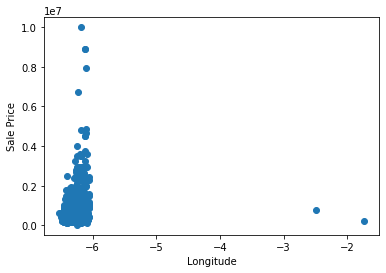

In [161]:
#Lets have a look at longitude values and see if there are outliers
plt.scatter(x=dftrain['longitude'], y=dftrain['price'])
plt.ylabel('Sale Price')
plt.xlabel('Longitude')
plt.show()

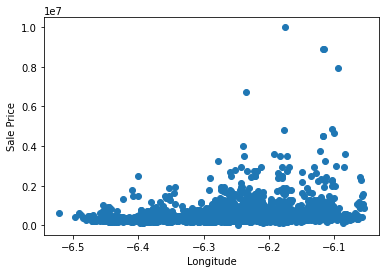

In [162]:
#Remove outliers - where longitude > -4
dftrain = dftrain[dftrain['longitude'] < -4]
#train = train[train['price'] < 4000000]
plt.scatter(x=dftrain['longitude'], y=dftrain['price'])
plt.ylabel('Sale Price')
plt.xlabel('Longitude')
plt.show()

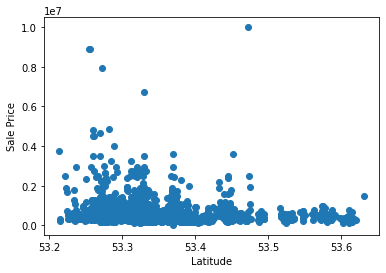

In [163]:
#Lets have a look at the latitude values
plt.scatter(x=dftrain['latitude'], y=dftrain['price'])
plt.ylabel('Sale Price')
plt.xlabel('Latitude')
plt.show()

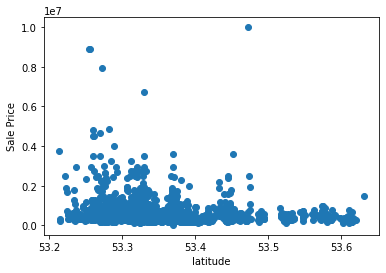

In [164]:
#Remove outliers where latitude < 53
dftrain = dftrain[dftrain['latitude'] > 53]
#train = train[train['price'] < 4000000]
plt.scatter(x=dftrain['latitude'], y=dftrain['price'])
plt.ylabel('Sale Price')
plt.xlabel('latitude')
plt.show()

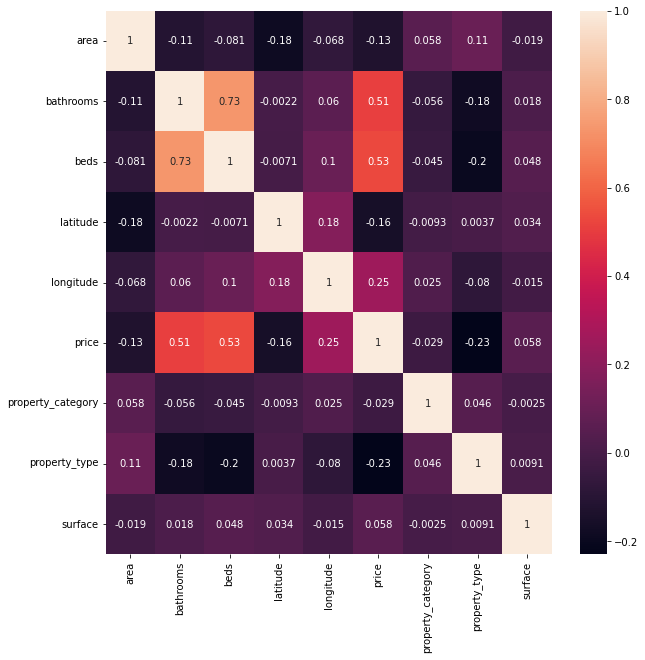

In [165]:
plt.figure(figsize=(10, 10))
sns.heatmap(dftrain.corr(), annot=True);

From the correlation matrix above, bathrooms, beds, and longitude seem to be the best predictors for the price

In [166]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#Seperate X, y columns
y = dftrain['price']
X = dftrain.drop('price', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(2260, 8)
(2260,)
(566, 8)
(566,)


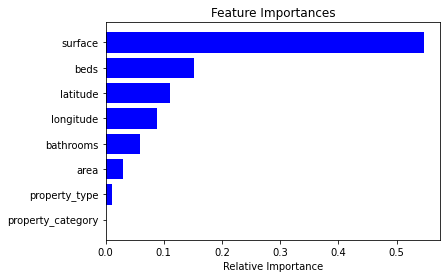

In [167]:
#Use a Random Forest model to determine the most important features to use
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(X_train, y_train)

features = dftrain.drop('price', axis=1).columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [168]:
#Another approach to finding the best features
numeric_features = dftrain.select_dtypes(include=[np.number])
numeric_features.dtypes

corr = numeric_features.corr()
print (corr['price'].sort_values(ascending=False)[:5], '\n')
print (corr['price'].sort_values(ascending=False)[-5:])

price        1.000000
beds         0.530352
bathrooms    0.508730
longitude    0.253504
surface      0.057874
Name: price, dtype: float64 

surface              0.057874
property_category   -0.028892
area                -0.126723
latitude            -0.155263
property_type       -0.229906
Name: price, dtype: float64


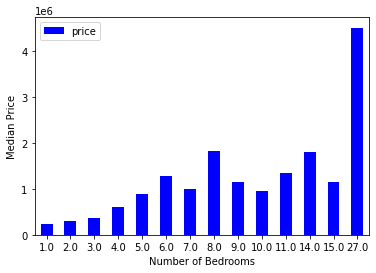

In [169]:
#Relationship between bedrooms and price
bedrooms_pivot = dftrain.pivot_table(index='beds',
                  values='price', aggfunc=np.median)

bedrooms_pivot.plot(kind='bar', color='blue')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Median Price')
plt.xticks(rotation=0)
plt.show()

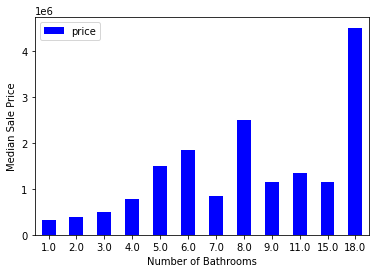

In [170]:
#Relationship between bathrooms and price
bathrooms_pivot = dftrain.pivot_table(index='bathrooms',
                  values='price', aggfunc=np.median)

bathrooms_pivot.plot(kind='bar', color='blue')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

The above shows the most important features in the model. We will use this feature important dataset to select the most important features to use in predicting house prices

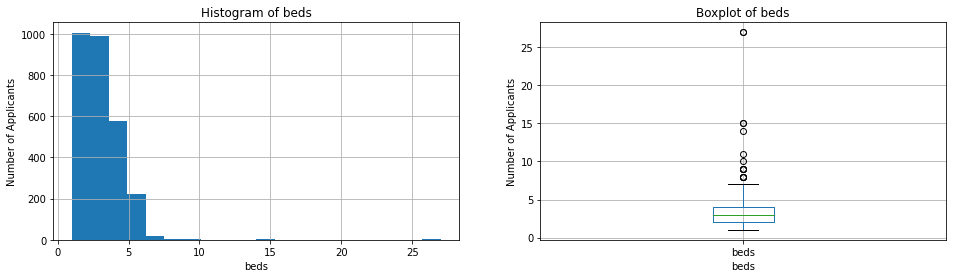

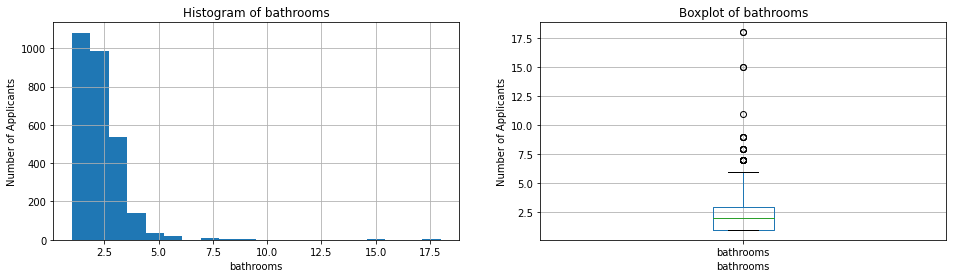

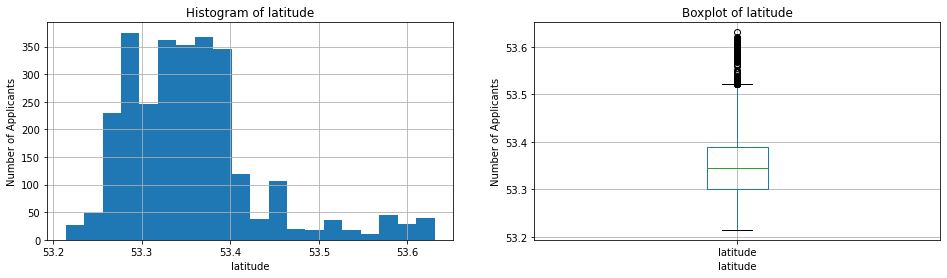

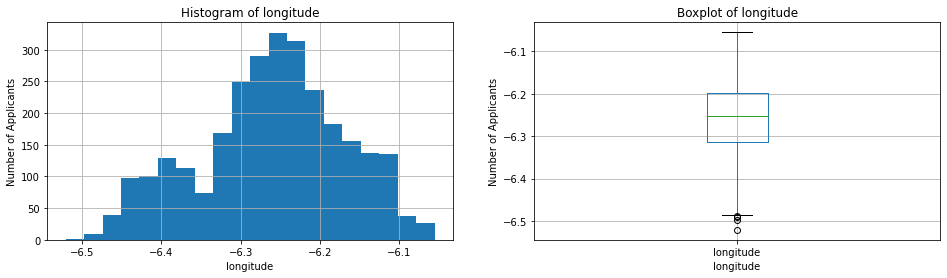

In [171]:
def plot_distribution(column_name):
    fig = plt.figure(figsize=(16,4))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.set_title("Histogram of " + column_name)
    ax1.set_xlabel(column_name)
    ax1.set_ylabel('Number of Applicants')
    dftrain[column_name].hist(bins=20)

    ax3 = fig.add_subplot(1, 2, 2)
    ax3.set_title("Boxplot of " + column_name)
    ax3.set_xlabel(column_name)
    ax3.set_ylabel('Number of Applicants')
    dftrain.boxplot(column=[column_name])

    plt.show()

plot_distribution('beds')
plot_distribution('bathrooms')
plot_distribution('latitude')
plot_distribution('longitude')

# 4.0 PIECEWISE REGRESSION

## 4.1 Full Model

In [172]:
# Based on the above results, we select the most important features

featrain = ['beds','bathrooms','latitude', 'longitude', 'price']
# dropna: remove missing values
df_subset_train = dftrain[featrain].dropna(axis=0)

featest = ['beds','bathrooms','latitude', 'longitude']
df_subset_test  =  dftest[featest].dropna(axis=0)

# cost
df_subset_cost = dfcost[dfcost.index.isin(df_subset_test.index)]

print(df_subset_train.shape)
print(df_subset_test.shape)
print(df_subset_cost.shape)

(2826, 5)
(500, 4)
(500, 2)


In [173]:
#Check that all our nan values are now removed
print('Number of nan in df_subset_train dataset: ',df_subset_train.isnull().sum().sum())
print('Number of nan in df_subset_test dataset: ',df_subset_test.isnull().sum().sum())

Number of nan in df_subset_train dataset:  0
Number of nan in df_subset_test dataset:  0


In [174]:
# train set, input columns
Xs_train = df_subset_train.iloc[:,0:-1].values 
# train set, output column, cost
ys_train = df_subset_train.iloc[:,-1].values.reshape(-1,1)   

# test set, input columns
Xs_test = df_subset_test.iloc[:,0:].values 
# test set, output column, cost
y_test = df_subset_cost.Expected.values

print("Xs_train shape:", Xs_train.shape)
print("ys_train shape:", ys_train.shape)

print("Xs_test shape:", Xs_test.shape)
print("y_test shape:", y_test.shape)

Xs_train shape: (2826, 4)
ys_train shape: (2826, 1)
Xs_test shape: (500, 4)
y_test shape: (500,)


In [175]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

Xss_train = np.hstack([Xs_train,Xs_train[:,[2]]**2])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

Xss_test = np.hstack([Xs_test,Xs_test[:,[2]]**2])
Xn_test = xscaler.transform(Xss_test)

ylog = np.log(ys_train.astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)

In [176]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])
    

Finished [100%]: Average Loss = 2,903.1


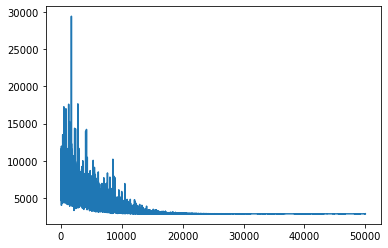

In [177]:
#Specify the number of iterations we require
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
plt.plot(approximation.hist);

In [178]:
# samples from the posterior
posterior = approximation.sample(5000)

In [179]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
print("MAE = ",(np.mean(abs(y_pred_BLR - y_test))))
print("MAPE = ",(np.mean(abs(y_pred_BLR - y_test) / y_test)))

MAE =  212195.72135355562
MAPE =  0.2782942674721907


####PPC on the full model

In [180]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred



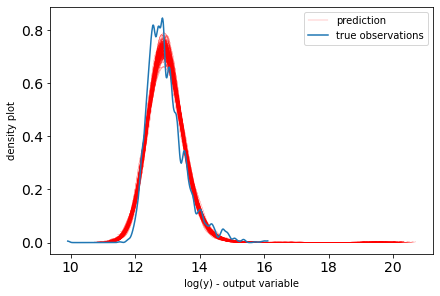

In [181]:
## Posterior predictive check (PPC) on the full model

num_samples2 = 200
Ypred = yscaler.inverse_transform(ppc(posterior['alpha'],posterior['beta'],posterior['sigma_n'],Xn_train, nsamples=num_samples2))

# plot prediction shape
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})
# label
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")

# true observations
az.plot_dist(ylog,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

## 4.2 Clustering

### 4.2.1 Gaussian Mixture Model 

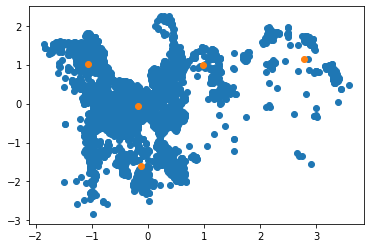

In [182]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5)

# clustering by features latitude and longitude
ind=[2,3]
X_ind = np.vstack([Xn_train[:,ind],Xn_test[:,ind]])
# Gaussian Mixture
gmm.fit(X_ind)

# plot blue dots
plt.scatter(X_ind[:,0],X_ind[:,1])
# centroids:  orange dots
plt.scatter(gmm.means_[:,0],gmm.means_[:,1])


From the Gaussian Mixture model, it is not totally clear the optimum number of clusters, so I will also try K-Means clustering and using the elbow method to see if I can get a better idea of the number of clusters 

### 4.2.2 Determine optimum number of clusters to use

We will use K-Means clustering to partition all our data points into k clusters. We will try for multiple different clusters, and calculate the inertia for each cluster, which is the sum of the distances of the samples to their closest cluster center. 

We are looking for an 'elbow' in the graph to determine the most appropriate k value. From the plot below, it appears 4 or 5 clusters are the optimum, I will choose 5 as an extra cluster might give a slight improvement in the model without overfitting.

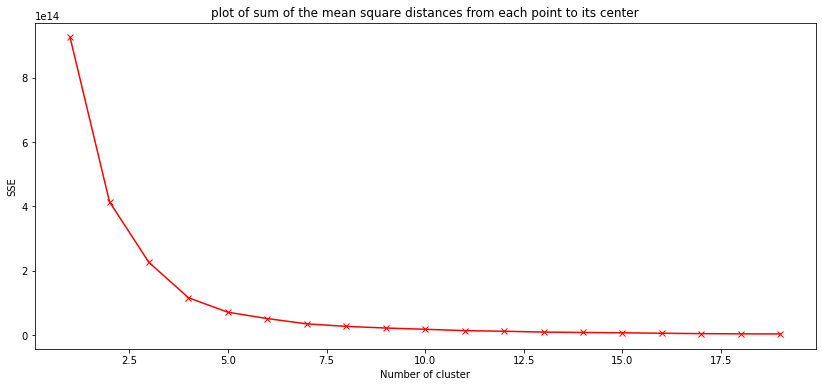

In [183]:
data = df_subset_train

sse = {}
for k in range(1, 20):
    kmeans = cluster.KMeans(init='k-means++', n_clusters=k, max_iter=300).fit(data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure(figsize=(14, 6))
plt.plot(list(sse.keys()), list(sse.values()), 'rx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("plot of sum of the mean square distances from each point to its center")
plt.show()

### 4.2.3 Generating Clusters of Data

In [184]:
# train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))


{0: 405, 1: 275, 2: 482, 3: 183, 4: 1481}

In [185]:
# test clusters
clusters_test = gmm.predict(Xn_test[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
dict(zip(unique_test, counts_test))

{0: 84, 1: 46, 2: 61, 3: 41, 4: 268}

In [186]:
# cluster 0
Xn0 = Xn_train[clusters_train==0,:]
Xtestn0 = Xn_test[clusters_test==0,:]

ylog0 = np.log(ys_train.astype('float')[clusters_train==0,:])
yscaler0 = StandardScaler().fit(ylog0)
yn0 = yscaler0.transform(ylog0)

In [187]:
# cluster 1
Xn1 = Xn_train[clusters_train==1,:]
Xtestn1 = Xn_test[clusters_test==1,:]
ylog1 = np.log(ys_train.astype('float')[clusters_train==1,:])
yscaler1 = StandardScaler().fit(ylog1)
yn1 = yscaler1.transform(ylog1)

In [188]:
# cluster 2
Xn2 = Xn_train[clusters_train==2,:]
Xtestn2 = Xn_test[clusters_test==2,:]
ylog2 = np.log(ys_train.astype('float')[clusters_train==2,:])
yscaler2 = StandardScaler().fit(ylog2)
yn2 = yscaler2.transform(ylog2)


In [189]:
# cluster 3
Xn3 = Xn_train[clusters_train==3,:]
Xtestn3 = Xn_test[clusters_test==3,:]
ylog3 = np.log(ys_train.astype('float')[clusters_train==3,:])
yscaler3 = StandardScaler().fit(ylog3)
yn3 = yscaler3.transform(ylog3)

In [190]:
# cluster 4
Xn4 = Xn_train[clusters_train==4,:]
Xtestn4 = Xn_test[clusters_test==4,:]
ylog4 = np.log(ys_train.astype('float')[clusters_train==4,:])
yscaler4 = StandardScaler().fit(ylog4)
yn4 = yscaler4.transform(ylog4)

## 4.3 Piecewise Model

In [191]:
# model_0
with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])

with model_0:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior0 = approximation.sample(5000)

Finished [100%]: Average Loss = 491.47


In [192]:
# model_1
with pm.Model() as model_1:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn1.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn1.T)
  # likelihood, # 
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn1[:,0])
  
with model_1:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior1 = approximation.sample(5000)

Finished [100%]: Average Loss = 261.8


In [193]:
# model_2
with pm.Model() as model_2:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn2.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  # linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn2.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn2[:,0])
    
with model_2:
  # iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior2 = approximation.sample(5000)

Finished [100%]: Average Loss = 513.43


In [194]:
# model_3
with pm.Model() as model3:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn3.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn3.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn3[:,0])
    
with model3:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior3 = approximation.sample(5000)

Finished [100%]: Average Loss = 221.27


In [195]:
# model_4
with pm.Model() as model4:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn4.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn4.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn4[:,0])
    
with model4:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior4 = approximation.sample(5000)

Finished [100%]: Average Loss = 1,476.5


## 4.4 Simulations


### Only Cluster 0

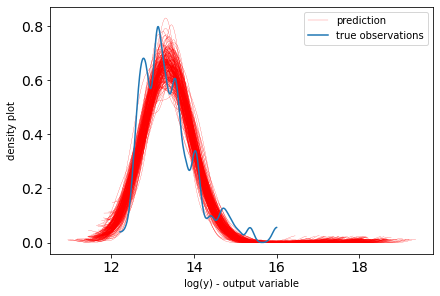

In [196]:
#Simulation
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))
for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog0,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

### Only Cluster 1

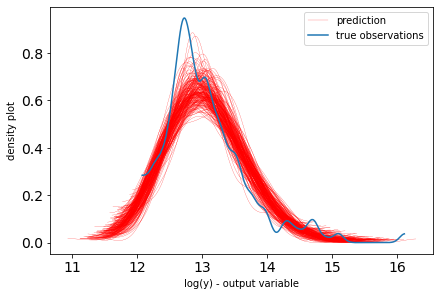

In [197]:
#Simulation
Ypred1 = yscaler1.inverse_transform(ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200))
for i in range(Ypred1.shape[0]):
    az.plot_dist( Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog1,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

### Only Cluster 2

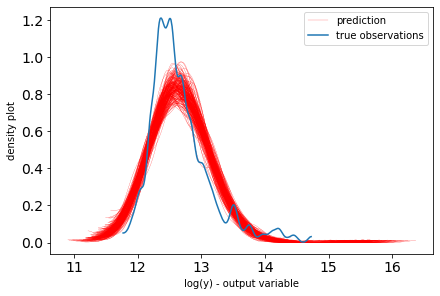

In [198]:
#Simulation
Ypred2 = yscaler2.inverse_transform(ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200))
for i in range(Ypred2.shape[0]):
    az.plot_dist( Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog2,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

### Only Cluster 3

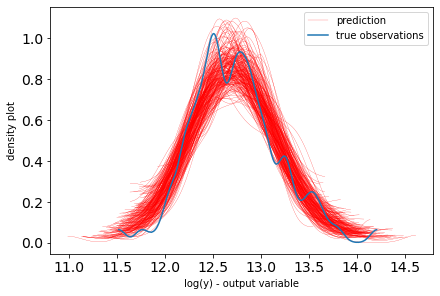

In [199]:
#Simulation
Ypred3 = yscaler3.inverse_transform(ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200))
for i in range(Ypred3.shape[0]):
    az.plot_dist( Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog3,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

### Only Cluster 4


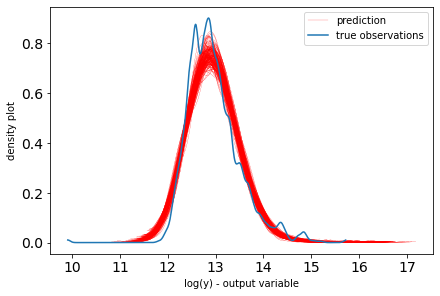

In [200]:
#Simulation
Ypred4 = yscaler4.inverse_transform(ppc(posterior4['alpha'],posterior4['beta'],posterior4['sigma_n'],Xn4,  nsamples=200))
for i in range(Ypred4.shape[0]):
    az.plot_dist( Ypred4[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred4[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog4,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

### Overall

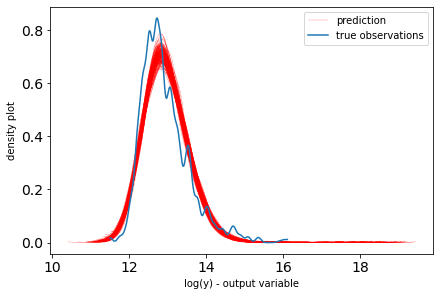

In [201]:
# posteriors
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200)
Ypred4 = ppc(posterior4['alpha'],posterior4['beta'],posterior4['sigma_n'],Xn4,  nsamples=200)

# simulation
Ypred = np.hstack([ yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3),
                 yscaler4.inverse_transform(Ypred4)])

# prediction
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})

# plot
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
ylog=np.vstack([ylog0,ylog1,ylog2,ylog3,ylog3])
az.plot_dist(ylog,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

## 4.5 Test set performance

In [202]:
# cluster 0
y_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0.T)))
print("Size Cluster0", np.sum(clusters_test==0), ", MAE Cluster0=",
      (np.mean(abs(y_pred_BLR0 - y_test[clusters_test==0]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR0 - y_test[clusters_test==0]) /y_test[clusters_test==0])))

# cluster 1
y_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1.T)))
print("Size Cluster1", np.sum(clusters_test==1), ", MAE Cluster1=",
      (np.mean(abs(y_pred_BLR1 - y_test[clusters_test==1]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR1 - y_test[clusters_test==1]) /y_test[clusters_test==1])))

# cluster 2
y_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2.T)))
print("Size Cluster2", np.sum(clusters_test==2), ", MAE Cluster2=",
      (np.mean(abs(y_pred_BLR2 - y_test[clusters_test==2]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR2 - y_test[clusters_test==2]) /y_test[clusters_test==2])))

# cluster 3
y_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3.T)))
print("Size Cluster3", np.sum(clusters_test==3), ", MAE Cluster3=",
      (np.mean(abs(y_pred_BLR3 - y_test[clusters_test==3]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR3 - y_test[clusters_test==3]) /y_test[clusters_test==3])))

# cluster 4
y_pred_BLR4 = np.exp(yscaler4.inverse_transform(np.mean(posterior4['alpha']) 
              + np.dot(np.mean(posterior4['beta'],axis=0), Xtestn4.T)))
print("Size Cluster4", np.sum(clusters_test==4), ", MAE Cluster4=",
      (np.mean(abs(y_pred_BLR4 - y_test[clusters_test==4]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR4 - y_test[clusters_test==4]) /y_test[clusters_test==4])))

# joint
joint=np.hstack([abs(y_pred_BLR0 - y_test[clusters_test==0]),
                 abs(y_pred_BLR1 - y_test[clusters_test==1]),
                 abs(y_pred_BLR2 - y_test[clusters_test==2]),
                 abs(y_pred_BLR3 - y_test[clusters_test==3]),
                 abs(y_pred_BLR4 - y_test[clusters_test==4])])

joint_mape = np.mean(np.hstack([
                        abs(y_pred_BLR0 - y_test[clusters_test==0]) /y_test[clusters_test==0],
                        abs(y_pred_BLR1 - y_test[clusters_test==1]) /y_test[clusters_test==1],
                        abs(y_pred_BLR2 - y_test[clusters_test==2]) /y_test[clusters_test==2],
                        abs(y_pred_BLR3 - y_test[clusters_test==3]) /y_test[clusters_test==3],
                        abs(y_pred_BLR4 - y_test[clusters_test==4]) /y_test[clusters_test==4]
                       ]))

# MAE
print("Overall MAE=",np.mean(joint))
print("Overall MAPE = ", joint_mape)

Size Cluster0 84 , MAE Cluster0= 280651.9770461635
MAPE =  0.28081931419996586
Size Cluster1 46 , MAE Cluster1= 159345.3181374806
MAPE =  0.26168412970526217
Size Cluster2 61 , MAE Cluster2= 118260.73449022038
MAPE =  0.23158811308919894
Size Cluster3 41 , MAE Cluster3= 83763.06305928288
MAPE =  0.23070678489129534
Size Cluster4 268 , MAE Cluster4= 220207.62597115873
MAPE =  0.2648725886825056
Overall MAE= 201136.96971161288
Overall MAPE =  0.26039599841026984


### PPC on the Test set



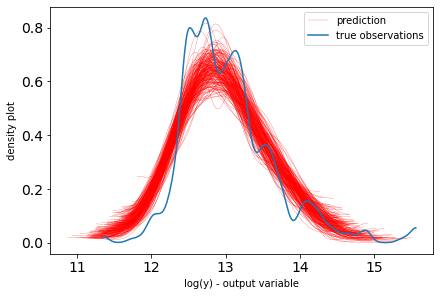

In [203]:
## Posterior predictive checks (PPCs)

num_samples2 = 200
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xtestn0, nsamples=num_samples2)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xtestn1, nsamples=num_samples2)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xtestn2, nsamples=num_samples2)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xtestn3, nsamples=num_samples2)

# Stack arrays in sequence horizontally (column wise)
Ypred = np.hstack([yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3)])

# plot prediction shape
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})
# label
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")

# true observations
az.plot_dist(np.log(y_test),label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

# 5.0 SUMMARY

Our goal in this Etivity was to build a supervised machine learning model to predict house prices, using a training dataset to build the model. In section 3 we carried out some Exploratory Data Analysis (EDA) to visualise and interprit the data supplied. We performed some pre-processing steps on the data to ensure some irrelevant columns were removed, and also outliers in our dataset were removed. We then used a heatmap to determine the relationship between the price and the input variables, and also used a Random Forest Model to determine the most important features to use in our model.

In section 4.1, we trained a baseline Bayesian regression model on our full dataset, and calculating the MAE and MAPE of the resulting model. In section 4.2.1, we used a Gaussain Mixture Model to determine the optimum number of clusters to use for our piecewise regression, based on a plot of latitude vs longitude. In section 4.2.2 we used K-Means clustering and the elbow method to try another approach to determine the number of clusters to use, and between both approaches I settled on five clusters as the optimum. I also tried training the models with four clusters, but the results were not altogether as good.

Having decided on the number of clusters, In section 4.2.3 we split out the training and test datasets into their respective clusters. For the training set, here are the number of samples in each cluster:

Cluster 0: 405

Cluster 1: 275

Cluster 2: 482

Cluster 3: 183

Cluster 4: 1481

Each of the clusters has a reasonable number of samples as you can see from the count of samples above. In section 4.3, we train an individual model on each of the five clusters using a Bayesian approach. 

In Section 4.4 on simulations, we compare the predicted values vs the true values for each of our training clusters. Section 4.5 then looks at the test data, and compares the predicted values from the model with the true values for the house prices. Following is a comparison of the results from the full model vs piecewise regression approach:

**Full Model:**

MAE =  212420.08106847273

MAPE =  0.27866224419024593

**Piecewise model:**

Overall MAE= 201312.5359053867

Overall MAPE =  0.2608193915628424

From the results we can see that we got an approximately 2% improvement on the predictions when we used the piecewise regression approach. We would expect to see an improvement in the results with the piecewise regression model, as each cluster is trained individually using linear regression and we can fit the data more accurately.

On our Group sessions we discussed the best approach to deciding on the optimum number of clusters to use for piecewise regression. We discussed using Multidimensional scaling (MDS), TSNE for visualising multidimensional data and principle component analysis. We also discussed using K-Means clustering with the elbow method to determine the number of clusters, something I used previously and found it to be very useful and hence the reason I used it above. 
We also discussed the features within the dataset, and the relevance of the different features. Which features could be ignored and if the area feature was necessary to include given that the latitude and longitude could also be a different representation of the area. I was reluctant to exclude area, as even two properties with very similar latitude/longitude if they are classified in different areas of Dublin, could have different costs.

We also discussed the use of HalfCauchy distribution when calculating our sigmna values. The conclusion on this was because sigma would not expect to be a negative number, HalfCauchy distribution would only provide only positive distribution.

We also discussed the initial results we were obtaining from the clusters vs the overall model. The general consensus was everyone was getting around 2% improvement, even though I would have expected the models to produce more acuracy than 26%.

It may be possible to get better results by doing some further pre-processing of the data to ensure that the features used had a normal distribution across the data. We could also spend more time cleansing the data and possibly utilising more of the features when predicting the target variable. 

Certainly the piecewise regression approach is ver useful when the data appears to be broken into segments and it is clear that seperate linear regression models would perform better against each cluster than a single linear regression model. I would have liked to see a MAPE lower than the final result, however the approach of using piecewise regression makes sense. However it may be important to limit the number of clusters to ensure we do not overfit the data. 



##References

En.wikipedia.org. 2021. Segmented regression - Wikipedia. [online] Available at: <https://en.wikipedia.org/wiki/Segmented_regression>

Kappel, S., 2017. Piecewise regression: when one line simply isn’t enough. [online] Piecewise regression: when one line simply isn’t enough. Available at: <https://www.datadoghq.com/blog/engineering/piecewise-regression/>.

Bock, T., 2021. What are Residuals?. [online] Displayr. Available at: <https://www.displayr.com/learn-what-are-residuals/>.

Penn State, 2021. 8.8 - Piecewise Linear Regression Models | STAT 501. [online] PennState: Statistics Online Courses. Available at: <https://online.stat.psu.edu/stat501/lesson/8/8.8>.

Ryan, S. and Porth, L., 2007. A tutorial on the piecewise regression approach applied to bedload transport data. [online] Fs.fed.us. Available at: <https://www.fs.fed.us/rm/pubs/rmrs_gtr189.pdf>

Seif, G., 2019. Understanding the 3 most common loss functions for Machine Learning Regression. [online] Medium. Available at: <https://towardsdatascience.com/understanding-the-3-most-common-loss-functions-for-machine-learning-regression-23e0ef3e14d3>

Solanki, G., 2020. Gaussian Mixture Model | What is Gaussian Mixture Model?. [online] GreatLearning Blog: Free Resources what Matters to shape your Career!. Available at: <https://www.mygreatlearning.com/blog/gaussian-mixture-model/>.

Scikit-yb.org. n.d. Elbow Method — Yellowbrick v1.3.post1 documentation. [online] Available at: <https://www.scikit-yb.org/en/latest/api/cluster/elbow.html> [Accessed 2 October 2021].